In [36]:
import sqlite3
import pandas as pd

In [37]:
fn = 'points.sqlite'
points = pd.read_sql('select * from points where not banned', sqlite3.connect(fn))

# activity

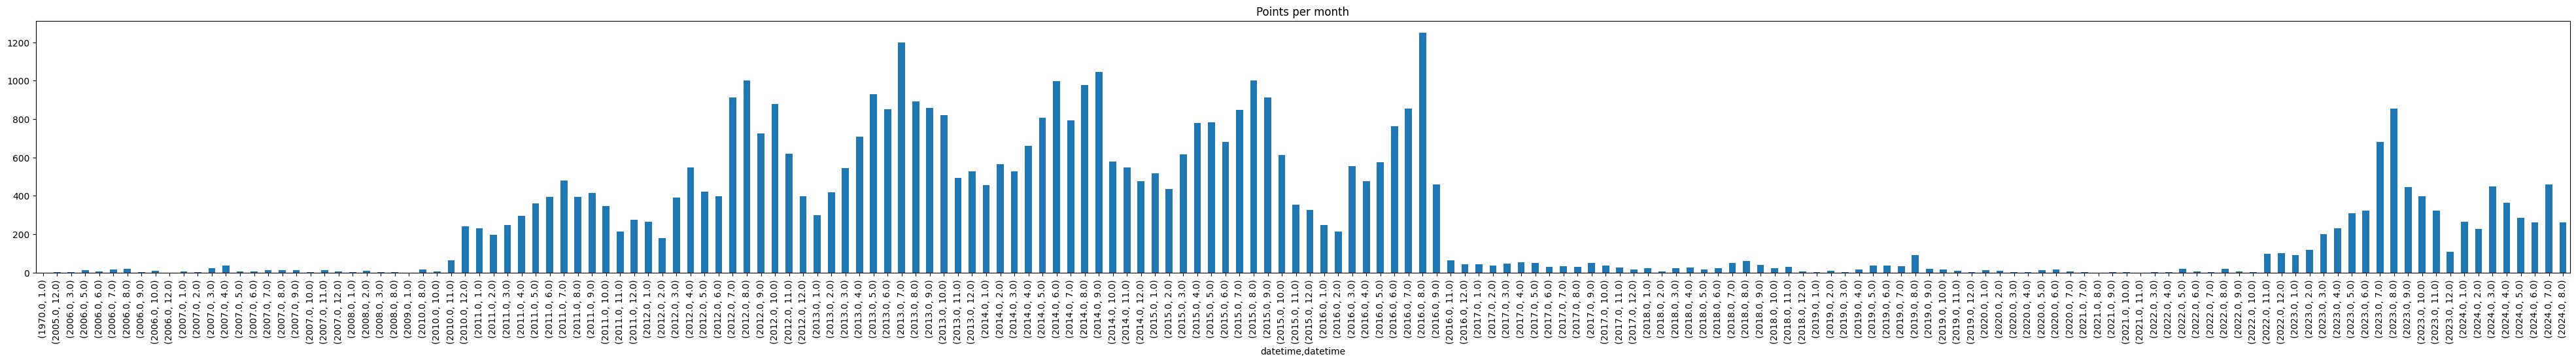

In [38]:
df = points
df["datetime"] = df["datetime"].astype("datetime64[ns]")

plot = df['datetime'].groupby([df["datetime"].dt.year, df["datetime"].dt.month]).count().plot(kind="bar", title="Points per month", figsize=(50, 5))
plot.figure.savefig("plots/points_per_month.png")

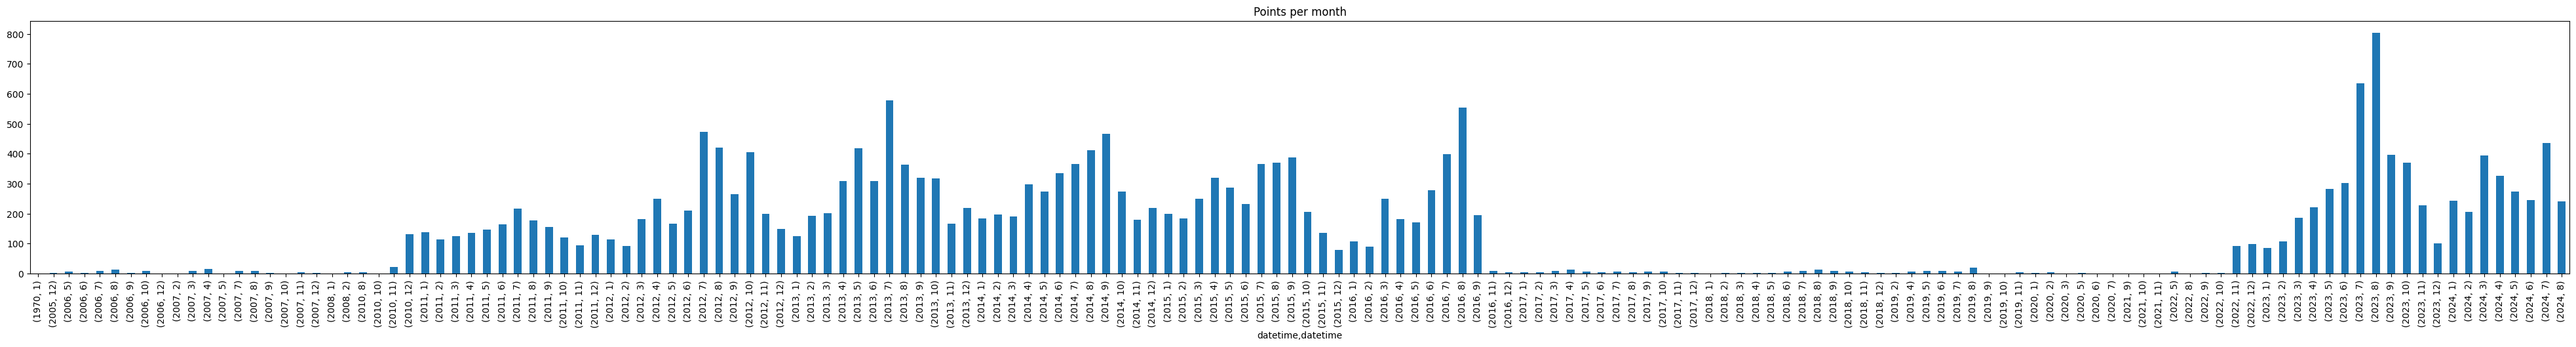

In [39]:
df = points[['datetime', 'wait']].dropna()
df["datetime"] = df["datetime"].astype("datetime64[ns]")

plot = df['datetime'].groupby([df["datetime"].dt.year, df["datetime"].dt.month]).count().plot(kind="bar", title="Points per month", figsize=(50, 5))
plot.figure.savefig("plots/points_per_month_with_waittime.png")

# top spots

In [40]:
groups = points.groupby(["lat", "lon"])
places = groups[["country"]].first()
places["rating"] = groups.rating.mean()
places["points"] = groups.size()

In [41]:
places['score'] = places['rating']**3 * places['points']
places.sort_values("score", ascending=False).head(5)

,,country,rating,points,score
lat,lon,,,,
51.079746,13.739534,DE,4.758621,29,656.689655
52.350834,16.732392,PL,4.925926,27,655.148148
49.542950,6.117797,LU,4.884615,26,620.346154
55.631100,12.656323,DK,4.956522,23,565.043478
51.049731,16.969725,PL,5.000000,21,525.000000


# worst spots

In [43]:
points['rating_reversed'] = 6 - points['rating']
groups = points.groupby(["lat", "lon"])
places = groups[["country"]].first()
places["rating"] = groups.rating.mean()
places['rating_reversed'] = groups.rating_reversed.mean()
places["points"] = groups.size()

In [47]:
places['score'] = places['rating_reversed']**3 * places['points']
places.sort_values("score", ascending=False).head(20)

,,country,rating,rating_reversed,points,score,negative_score
lat,lon,,,,,,
43.588784,3.890394,FR,1.888889,4.111111,9,625.345679,32.111111
46.683186,13.672335,AT,2.000000,4.000000,9,576.000000,36.000000
50.000121,14.395623,CZ,3.000000,3.000000,20,540.000000,180.000000
43.380599,21.809835,RS,2.000000,4.000000,8,512.000000,32.000000
39.706196,73.228855,KG,1.000000,5.000000,4,500.000000,4.000000
45.473795,12.213750,IT,1.000000,5.000000,4,500.000000,4.000000
47.774276,7.379798,FR,1.857143,4.142857,7,497.734694,24.142857
46.372202,19.997143,HU,3.055556,2.944444,18,459.496914,168.055556
51.478416,-2.711027,GB,2.000000,4.000000,7,448.000000,28.000000
